# ALTEGRAD TP 5 - DEEP LEARNING
## Yoach Lacombe

In [ ]:
import torch
import gensim
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd 'My Drive'/

Mounted at /gdrive
/gdrive
/gdrive/My Drive


In [ ]:
%ls dataset_ALTEGRAD/

CA-HepTh.txt  cora.content     karate_labels.txt
cora.cites    karate.edgelist  web_sample.edgelist


In [ ]:
PATH_EDGE_LIST = './dataset_ALTEGRAD/web_sample.edgelist'
PATH_KARATE_EDGE_LIST = './dataset_ALTEGRAD/karate.edgelist'
PATH_KARATE_LABELS = './dataset_ALTEGRAD/karate_labels.txt'
PATH_CORA_CITES =  './dataset_ALTEGRAD/cora.cites'
PATH_CORA_CONTENT =  './dataset_ALTEGRAD/cora.content'
PATH_CA_HEPTH =  './dataset_ALTEGRAD/CA-HepTh.txt'

# Part 1

In [ ]:
"""
Deep Learning on Graphs - ALTEGRAD - Jan 2022
"""

import numpy as np
import networkx as nx
from random import randint, choice
from gensim.models import Word2Vec


############## Task 1
# Simulates a random walk of length "walk_length" starting from node "node"
def random_walk(G, node, walk_length):
    
    ##################
    # your code here #
    ##################
    walk = [node]
    for j in range(walk_length -1):
      walk.append(choice(list(G.neighbors(walk[-1]))))
    
    
    walk = [str(node) for node in walk]
    return walk


############## Task 2
# Runs "num_walks" random walks from each node
def generate_walks(G, num_walks, walk_length):
    walks = []
    
    ##################
    # your code here #
    ##################
    for n in list(G.nodes()):
      walks += [random_walk(G, n, walk_length) for k in range(num_walks)] 
    
    return walks

# Simulates walks and uses the Skipgram model to learn node representations
def deepwalk(G, num_walks, walk_length, n_dim):
    print("Generating walks")
    walks = generate_walks(G, num_walks, walk_length)

    print("Training word2vec")
    model = Word2Vec(size=n_dim, window=8, min_count=0, sg=1, workers=8, hs=1)
    model.build_vocab(walks)
    model.train(walks, total_examples=model.corpus_count, epochs=5)

    return model

In [ ]:
"""
Deep Learning on Graphs - ALTEGRAD - Jan 2022
"""

import networkx as nx
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loads the web graph
G = nx.read_weighted_edgelist(PATH_EDGE_LIST, delimiter=' ', create_using=nx.Graph())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


############## Task 3
# Extracts a set of random walks from the web graph and feeds them to the Skipgram model
n_dim = 128
n_walks = 10
walk_length = 20


##################
# your code here #
##################

model = deepwalk(G, n_walks, walk_length, n_dim)  

Number of nodes: 33226
Number of edges: 354529
Generating walks
Training word2vec


['https://twitter.com', 'https://www.youtube.com', 'https://www.linkedin.com', 'https://plus.google.com', 'https://fr.wikipedia.org', 'http://twitter.com', 'http://www.slate.fr', 'https://play.google.com', 'https://itunes.apple.com', 'http://www.youtube.com', 'https://www.google.com', 'https://www.pinterest.com', 'https://en.wikipedia.org', 'https://www.service-public.fr', 'https://support.google.com', 'https://lesmoutonsenrages.fr', 'http://www.linkedin.com', 'https://www.google.fr', 'http://www.culture.gouv.fr', 'http://pinterest.com', 'http://www.ac-versailles.fr', 'https://www.letudiant.fr', 'https://vimeo.com', 'https://www.meta-media.fr', 'http://www.cnrs.fr', 'https://www.cnil.fr', 'https://www.huffingtonpost.fr', 'https://www.irdes.fr', 'https://www.reduc.fr', 'https://www.liberation.fr', 'https://www.cnetfrance.fr', 'https://www.latribune.fr', 'http://www.epi.asso.fr', 'https://www.legifrance.gouv.fr', 'http://bit.ly', 'https://www.economie.gouv.fr', 'https://docs.google.com',

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


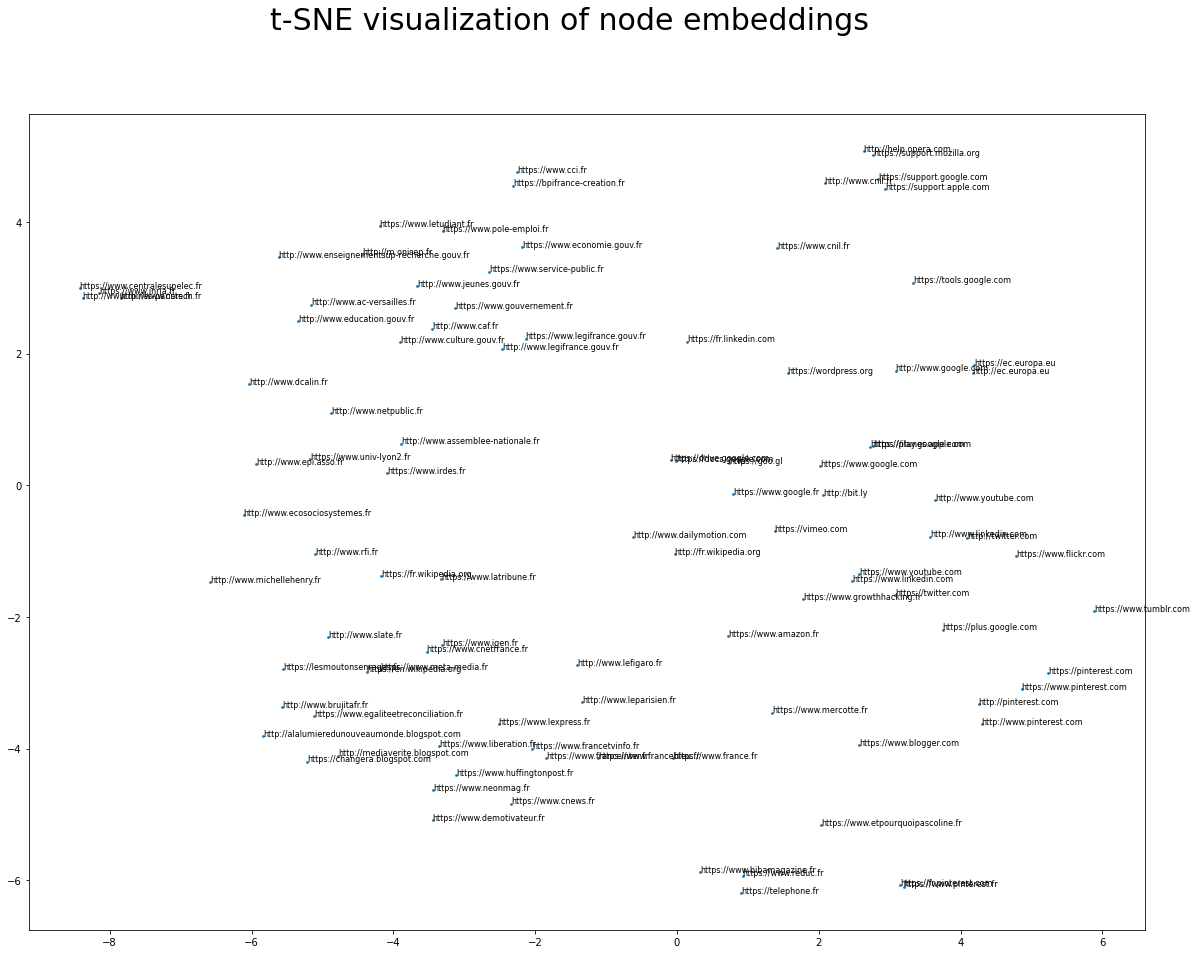

In [ ]:

############## Task 4
# Visualizes the representations of the 100 nodes that appear most frequently in the generated walks
def visualize(model, n, dim):
    
    nodes = model.wv.index2word[:n]
    vecs = np.empty(shape=(n, dim))
    print(nodes)
    
    ##################
    # your code here #
    ##################
    for i in range(n):
      vecs[i, :] = model.wv[nodes[i]]


    my_pca = PCA(n_components=10)
    my_tsne = TSNE(n_components=2)

    vecs_pca = my_pca.fit_transform(vecs)
    vecs_tsne = my_tsne.fit_transform(vecs_pca)

    fig, ax = plt.subplots()
    ax.scatter(vecs_tsne[:,0], vecs_tsne[:,1],s=3)
    for x, y, node in zip(vecs_tsne[:,0] , vecs_tsne[:,1], nodes):     
        ax.annotate(node, xy=(x, y), size=8)
    fig.suptitle('t-SNE visualization of node embeddings',fontsize=30)
    fig.set_size_inches(20,15)
    plt.show()


visualize(model, 100, n_dim)

Number of nodes: 34
Number of edges: 78
Generating walks
Training word2vec


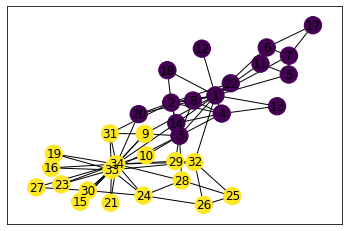

In [ ]:
"""
Deep Learning on Graphs - ALTEGRAD - Jan 2022
"""

import networkx as nx
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics import accuracy_score

# Loads the karate network
G = nx.read_weighted_edgelist(PATH_KARATE_EDGE_LIST, delimiter=' ', nodetype=int, create_using=nx.Graph())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

n = G.number_of_nodes()

# Loads the class labels
class_labels = np.loadtxt(PATH_KARATE_LABELS, delimiter=',', dtype=np.int32)
idx_to_class_label = dict()
for i in range(class_labels.shape[0]):
    idx_to_class_label[class_labels[i,0]] = class_labels[i,1]

y = list()
for node in G.nodes():
    y.append(idx_to_class_label[node])

y = np.array(y)


############## Task 5

##################
# your code here #
##################
nx.draw_networkx(G, node_color=y)




############## Task 6
n_dim = 128
n_walks = 10
walk_length = 20
model = deepwalk(G, n_walks, walk_length, n_dim)  

embeddings = np.zeros((n, n_dim))
for i, node in enumerate(G.nodes()):
    embeddings[i,:] = model.wv[str(node)]

idx = np.random.RandomState(seed=42).permutation(n)
idx_train = idx[:int(0.8*n)]
idx_test = idx[int(0.8*n):]

X_train = embeddings[idx_train,:]
X_test = embeddings[idx_test,:]

y_train = y[idx_train]
y_test = y[idx_test]

In [ ]:

############## Task 7



logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

print("accuracy of the logistic regression:", accuracy_score(y_test, logistic_model.predict(X_test)))



accuracy of the logistic regression: 1.0



In [ ]:
############## Task 8

adj = nx.to_numpy_matrix(G)
laplacian_model = SpectralEmbedding()
laplacian_model.fit(adj)


logistic_model = LogisticRegression()
logistic_model.fit(laplacian_model.embedding_[idx_train,:], y_train)

print("accuracy of the logistic regression:", accuracy_score(y_test, logistic_model.predict(laplacian_model.embedding_[idx_test,:])))


accuracy of the logistic regression: 0.7142857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


**note:** we observe that the DeepWalk embedding produces better results than the Spectral embedding.

# Part 2

In [ ]:
"""
Deep Learning on Graphs - ALTEGRAD - Jan 2022
"""

import scipy.sparse as sp
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder

def normalize_adjacency(A):
    ############## Task 9
    
    ##################
    # your code here #
    ##################
    diag = A.sum(axis = 1)
    d = sp.identity(A.shape[0])
    d.setdiag(1/diag[0])
    d = np.sqrt(d)

    A_normalized = d@(A + sp.identity(A.shape[0]))@A


    return A_normalized


def load_cora():
    idx_features_labels = np.genfromtxt(PATH_CORA_CONTENT, dtype=np.dtype(str))
    features = sp.csr_matrix(idx_features_labels[:, 1:-1], dtype=np.float32)
    features = features.todense()
    features /= features.sum(1).reshape(-1, 1)
    
    class_labels = idx_features_labels[:, -1]
    le = LabelEncoder()
    class_labels = le.fit_transform(class_labels)

    # build graph
    idx = np.array(idx_features_labels[:, 0], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    edges_unordered = np.genfromtxt(PATH_CORA_CITES, dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())), dtype=np.int32).reshape(edges_unordered.shape)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])), shape=(class_labels.size, class_labels.size), dtype=np.float32)

    # build symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

    print('Dataset has {} nodes, {} edges, {} features.'.format(adj.shape[0], edges.shape[0], features.shape[1]))

    return features, adj, class_labels


def sparse_to_torch_sparse(M):
    """Converts a sparse SciPy matrix to a sparse PyTorch tensor"""
    M = M.tocoo().astype(np.float32)
    indices = torch.from_numpy(np.vstack((M.row, M.col)).astype(np.int64))
    values = torch.from_numpy(M.data)
    shape = torch.Size(M.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

In [ ]:
"""
Deep Learning on Graphs - ALTEGRAD - Jan 2022
"""

import torch
import torch.nn as nn
import torch.nn.functional as F

class GNN(nn.Module):
    """Simple GNN model"""
    def __init__(self, n_feat, n_hidden_1, n_hidden_2, n_class, dropout):
        super(GNN, self).__init__()

        self.fc1 = nn.Linear(n_feat, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, n_class)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()

    def forward(self, x_in, adj):
        ############## Tasks 10 and 13
        
        ##################
        # your code here #
        ##################
        x = self.relu(torch.mm(adj,self.fc1(x_in)))
        x = self.dropout(x)
        x = self.relu(torch.mm(adj,self.fc2(x)))
        x = self.fc3(x)

        return F.log_softmax(x, dim=1)

In [ ]:
"""
Deep Learning on Graphs - ALTEGRAD - Jan 2022
"""

import numpy as np
import networkx as nx
import time
import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score



# Initialize device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 100
n_hidden_1 = 8
n_hidden_2 = 16
learning_rate = 0.01
dropout_rate = 0.1

# Loads the karate network
G = nx.read_weighted_edgelist(PATH_KARATE_EDGE_LIST, delimiter=' ', nodetype=int, create_using=nx.Graph())
print(G.number_of_nodes())
print(G.number_of_edges())

n = G.number_of_nodes()

# Loads the class labels
class_labels = np.loadtxt(PATH_KARATE_LABELS, delimiter=',', dtype=np.int32)
idx_to_class_label = dict()
for i in range(class_labels.shape[0]):
    idx_to_class_label[class_labels[i,0]] = class_labels[i,1]

y = list()
for node in G.nodes():
    y.append(idx_to_class_label[node])

y = np.array(y)
n_class = 2

adj = nx.adjacency_matrix(G) # Obtains the adjacency matrix
adj = normalize_adjacency(adj) # Normalizes the adjacency matrix

############## Task 12
# Set the feature of all nodes to the same value
features = np.eye(n) # Generates node features

# Yields indices to split data into training and test sets
idx = np.random.RandomState(seed=42).permutation(n)
idx_train = idx[:int(0.8*n)]
idx_test = idx[int(0.8*n):]

# Transforms the numpy matrices/vectors to torch tensors
features = torch.FloatTensor(features).to(device)
y = torch.LongTensor(y).to(device)
adj = sparse_to_torch_sparse(adj).to(device)
idx_train = torch.LongTensor(idx_train).to(device)
idx_test = torch.LongTensor(idx_test).to(device)

# Creates the model and specifies the optimizer
model = GNN(features.shape[1], n_hidden_1, n_hidden_2, n_class, dropout_rate).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = F.nll_loss(output[idx_train], y[idx_train])
    acc_train = accuracy_score(torch.argmax(output[idx_train], dim=1).detach().cpu().numpy(), y[idx_train].cpu().numpy())
    loss_train.backward()
    optimizer.step()

    print('Epoch: {:03d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train),
          'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = F.nll_loss(output[idx_test], y[idx_test])
    acc_test = accuracy_score(torch.argmax(output[idx_test], dim=1).detach().cpu().numpy(), y[idx_test].cpu().numpy())
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test))


# Train model
t_total = time.time()
for epoch in range(epochs):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))
print()

# Testing
test()

34
78
Epoch: 001 loss_train: 1.3732 acc_train: 0.1852 time: 0.1274s
Epoch: 002 loss_train: 9.7317 acc_train: 0.5556 time: 0.0049s
Epoch: 003 loss_train: 6.4199 acc_train: 0.5556 time: 0.0031s
Epoch: 004 loss_train: 0.3428 acc_train: 0.8148 time: 0.0033s
Epoch: 005 loss_train: 4.7344 acc_train: 0.4444 time: 0.0032s
Epoch: 006 loss_train: 4.7609 acc_train: 0.4444 time: 0.0034s
Epoch: 007 loss_train: 3.0393 acc_train: 0.2222 time: 0.0035s
Epoch: 008 loss_train: 2.4842 acc_train: 0.4444 time: 0.0031s
Epoch: 009 loss_train: 2.3507 acc_train: 0.5185 time: 0.0030s
Epoch: 010 loss_train: 2.9405 acc_train: 0.5556 time: 0.0021s
Epoch: 011 loss_train: 1.6358 acc_train: 0.5556 time: 0.0032s
Epoch: 012 loss_train: 1.0348 acc_train: 0.5556 time: 0.0052s
Epoch: 013 loss_train: 0.6296 acc_train: 0.8148 time: 0.0038s
Epoch: 014 loss_train: 0.7826 acc_train: 0.4444 time: 0.0032s
Epoch: 015 loss_train: 0.6492 acc_train: 0.6667 time: 0.0032s
Epoch: 016 loss_train: 0.3850 acc_train: 0.8148 time: 0.0027s
Ep

In [ ]:
##### TASK 13
class GNN(nn.Module):
    """Simple GNN model"""
    def __init__(self, n_feat, n_hidden_1, n_hidden_2, n_class, dropout):
        super(GNN, self).__init__()

        self.fc1 = nn.Linear(n_feat, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, n_class)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()

    def forward(self, x_in, adj):
        ############## Tasks 10 and 13
        
        ##################
        # your code here #
        ##################
        x = self.relu(torch.mm(adj,self.fc1(x_in)))
        x = self.dropout(x)
        x = self.relu(torch.mm(adj,self.fc2(x)))
        xx = self.fc3(x)

        return F.log_softmax(xx, dim=1), x

In [ ]:
"""
Deep Learning on Graphs - ALTEGRAD - Jan 2022
"""

import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE


# Initialize device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 100
n_hidden_1 = 64
n_hidden_2 = 32
learning_rate = 0.01
dropout_rate = 0.5

# Read data
features, adj, class_labels = load_cora()
n = adj.shape[0] # Number of nodes
n_class = np.unique(class_labels).size # Number of classes

adj = normalize_adjacency(adj) # Normalize adjacency matrix

# Yields indices to split data into training, validation and test sets
idx = np.random.permutation(n)
idx_train = idx[:int(0.6*n)]
idx_val = idx[int(0.6*n):int(0.8*n)]
idx_test = idx[int(0.8*n):]

# Transform the numpy matrices/vectors to torch tensors
features = torch.FloatTensor(features).to(device)
y = torch.LongTensor(class_labels).to(device)
adj = sparse_to_torch_sparse(adj).to(device)
idx_train = torch.LongTensor(idx_train).to(device)
idx_val = torch.LongTensor(idx_val).to(device)
idx_test = torch.LongTensor(idx_test).to(device)

# Creates the model and specifies the optimizer
model = GNN(features.shape[1], n_hidden_1, n_hidden_2, n_class, dropout_rate).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output,_ = model(features, adj)
    loss_train = F.nll_loss(output[idx_train], y[idx_train])
    acc_train = accuracy_score(torch.argmax(output[idx_train], dim=1).detach().cpu().numpy(), y[idx_train].cpu().numpy())
    loss_train.backward()
    optimizer.step()

    
    model.eval()
    output,_ = model(features, adj)

    loss_val = F.nll_loss(output[idx_val], y[idx_val])
    acc_val = accuracy_score(torch.argmax(output[idx_val], dim=1).detach().cpu().numpy(), y[idx_val].cpu().numpy())
    print('Epoch: {:03d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val),
          'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output, embeddings = model(features, adj)
    loss_test = F.nll_loss(output[idx_test], y[idx_test])
    acc_test = accuracy_score(torch.argmax(output[idx_test], dim=1).detach().cpu().numpy(), y[idx_test].cpu().numpy())
    
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test))

    return embeddings[idx_test]


# Train model
t_total = time.time()
for epoch in range(epochs):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))
print()

# Testing
embeddings_test = test()


Dataset has 2708 nodes, 5429 edges, 1433 features.
Epoch: 001 loss_train: 9.7214 acc_train: 0.0850 loss_val: 40.1522 acc_val: 0.3173 time: 0.0902s
Epoch: 002 loss_train: 35.1709 acc_train: 0.2611 loss_val: 27.2305 acc_val: 0.1144 time: 0.0803s
Epoch: 003 loss_train: 27.4262 acc_train: 0.0942 loss_val: 40.7876 acc_val: 0.1218 time: 0.0765s
Epoch: 004 loss_train: 34.7607 acc_train: 0.1576 loss_val: 30.7216 acc_val: 0.1218 time: 0.0838s
Epoch: 005 loss_train: 28.8497 acc_train: 0.1700 loss_val: 24.7533 acc_val: 0.1458 time: 0.0791s
Epoch: 006 loss_train: 21.6961 acc_train: 0.1773 loss_val: 12.7489 acc_val: 0.2435 time: 0.0774s
Epoch: 007 loss_train: 11.1779 acc_train: 0.2291 loss_val: 11.2270 acc_val: 0.3727 time: 0.0831s
Epoch: 008 loss_train: 9.0868 acc_train: 0.3202 loss_val: 16.8838 acc_val: 0.3266 time: 0.0809s
Epoch: 009 loss_train: 14.4489 acc_train: 0.2974 loss_val: 13.2029 acc_val: 0.4207 time: 0.0783s
Epoch: 010 loss_train: 9.9882 acc_train: 0.3861 loss_val: 11.9597 acc_val: 0.2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


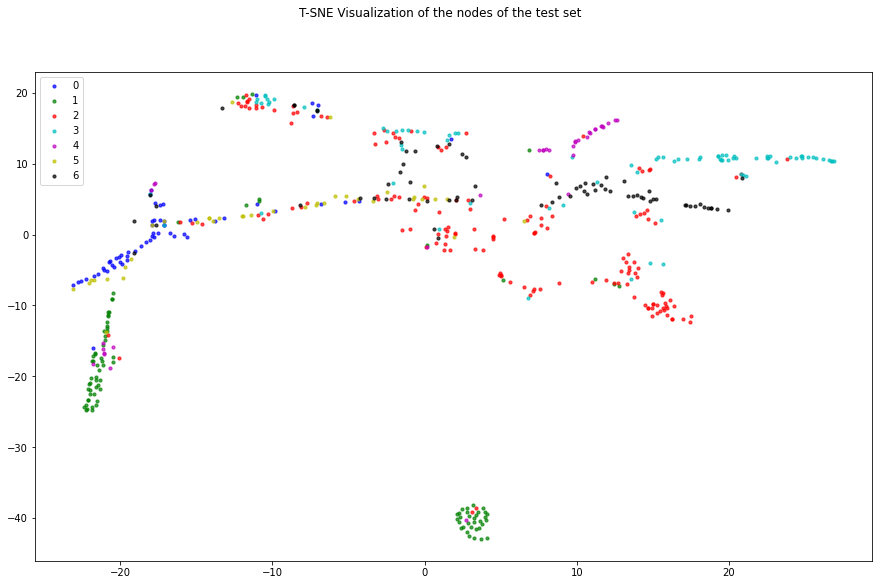

In [ ]:

############## Task 13
# Transforms torch tensor to numpy matrix

##################
# your code here #
##################

new_embeddings_tests = embeddings_test.detach().cpu().numpy()

# Projects the emerging representations to two dimensions using t-SNE

##################
# your code here #
##################
my_tsne = TSNE(n_components=2)
embeddings_test_2d = my_tsne.fit_transform(new_embeddings_tests)



labels = class_labels[idx_test.cpu().numpy()]
unique_labels = np.unique(labels)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig, ax = plt.subplots()
for i in range(unique_labels.size):
    idxs = [j for j in range(labels.size) if labels[j]==unique_labels[i]]
    ax.scatter(embeddings_test_2d[idxs,0], 
               embeddings_test_2d[idxs,1], 
               c=colors[i],
               label=i,
               alpha=0.7,
               s=10)

ax.legend(scatterpoints=1)
fig.suptitle('T-SNE Visualization of the nodes of the test set',fontsize=12)
fig.set_size_inches(15,9)
plt.show()